In [8]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

#### 1.保存

In [28]:
torch.manual_seed(1)  # 每次随机产生的数据都一样
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
print(x.size())
y = x.pow(2) + 0.2*torch.rand(x.size())
print(y.size())
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # 搭建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func = torch.nn.MSELoss()
    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title("Net1")
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), "r-", lw=5)

    # 两种方法保存模型
    torch.save(net1, "net.pkl")   # 保存整个网络
    torch.save(net1.state_dict(), "net_params.pkl")  # 只保存网络中的参数（速度快，占内存少）
    


torch.Size([100, 1])
torch.Size([100, 1])


### 2. 提取网络

In [29]:
def restore_net():
    net2 = torch.load("net.pkl")
    prediction = net2(x)
    
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    
# 推荐此方法
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    net3.load_state_dict(torch.load("net_params.pkl"))
    prediction = net3(x)
    
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()


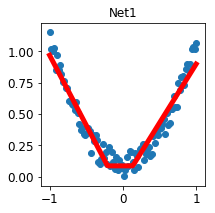

In [32]:
save()

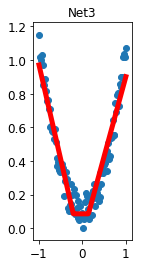

In [33]:
restore_params()